In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
my_data = pd.read_csv("~/my_log.csv")

my_data = my_data[my_data.Time != 'Time']['Time'].astype(float) #dropping non numbers

rabbit_data = pd.read_csv("~/rabbit_log.csv")

rabbit_data = rabbit_data[rabbit_data.Time != 'Time']['Time'].astype(float) #dropping non numbers

In [14]:
my_data.describe()

count    1.234000e+03
mean     2.932278e+09
std      2.657637e+09
min      1.020623e+07
25%      7.020982e+08
50%      2.053547e+09
75%      4.554019e+09
max      1.006277e+10
Name: Time, dtype: float64

In [15]:
nano = 1000000.0
means = []
stds = []
means.append(rabbit_data.mean()/nano)
means.append(my_data.mean()/nano)

stds.append(rabbit_data.std())
stds.append(my_data.std())

index = np.arange(len(means))

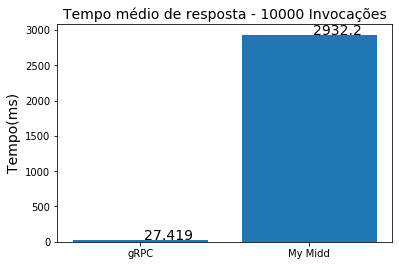

In [16]:
objects = ["gRPC", "My Midd"]
#plt.bar(index, means, yerr=stds)
plt.bar(index, means)
plt.xticks(index, objects)

for a,b in zip(index, means):
    plt.text(a+0.02, b+0.02, str(b)[0:6], fontsize=14)
plt.ylabel("Tempo(ms)", fontsize=14)
plt.title("Tempo médio de resposta - 10000 Invocações", fontsize=14)
plt.savefig('fig1.png')
plt.show()

In [47]:
udp_data = pd.read_csv("~/Output/udp_client1/log_client1.csv")
tcp_data = pd.read_csv("~/Output/tcp_client1/log_client1.csv")

udp_data = udp_data[udp_data.Time != 'Time']['Time'].astype(float) #dropping non numbers
tcp_data = tcp_data[tcp_data.Time != 'Time']['Time'].astype(float) #dropping non numbers

# udp_data = outliersCut(udp_data,10)
# tcp_data = outliersCut(tcp_data,10)

In [48]:
udp_data.describe()

count    300000.000000
mean          0.059925
std           0.024280
min           0.036838
25%           0.042607
50%           0.048005
75%           0.073606
max           1.306998
Name: Time, dtype: float64

In [49]:
tcp_data.describe()

count    300000.000000
mean          0.061509
std           0.019584
min           0.043657
25%           0.050292
50%           0.053186
75%           0.061616
max           0.450883
Name: Time, dtype: float64

In [50]:
objects = ["UDP", "TCP", "gRPC", "RabbitMQ", "My Midd"]
means = []
stds = []
means.append(udp_data.mean())
means.append(tcp_data.mean())
means.append(grpc_data.mean())
means.append(rabbit_data.mean())
means.append(my_data.mean())

stds.append(udp_data.std())
stds.append(tcp_data.std())
stds.append(grpc_data.std())
stds.append(rabbit_data.std())
stds.append(my_data.std())

index = np.arange(len(means))


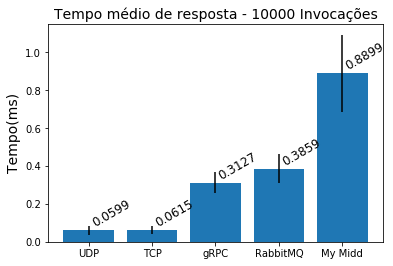

In [51]:
plt.bar(index, means, yerr=stds)
plt.xticks(index, objects)

for a,b in zip(index, means):
    plt.text(a+0.02, b+0.02, str(b)[0:6], fontsize=12, rotation=30)
plt.ylabel("Tempo(ms)", fontsize=14)
plt.title("Tempo médio de resposta - 10000 Invocações", fontsize=14)
plt.savefig('fig2.png')
plt.show()

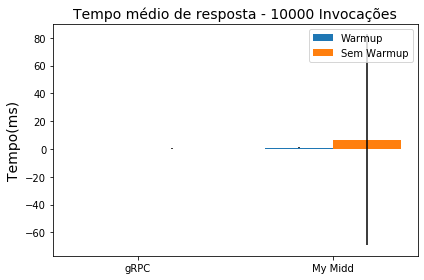

In [52]:
objects = ["gRPC", "My Midd"]
means = []
stds = []

means.append(grpc_data.mean())
means.append(my_data.mean())

stds.append(grpc_data.std())
stds.append(my_data.std())

means_wo = []
stds_wo = []

means_wo.append(grpc_data_wo.mean())
means_wo.append(my_data_wo.mean())

stds_wo.append(grpc_data_wo.std())
stds_wo.append(my_data_wo.std())

index = np.arange(len(means))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(index - width/2, means, width, label='Warmup', yerr=stds)
rects2 = ax.bar(index + width/2, means_wo, width, label='Sem Warmup', yerr=stds_wo)

plt.xticks(index, objects)

plt.ylabel("Tempo(ms)", fontsize=14)
plt.title("Tempo médio de resposta - 10000 Invocações", fontsize=14)
plt.legend()
plt.savefig('fig3.png')
fig.tight_layout()
plt.show()


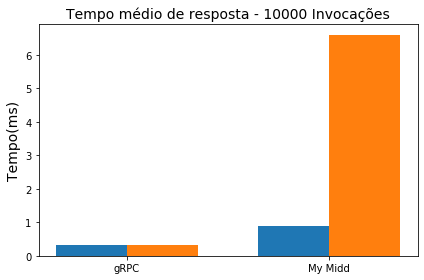

In [53]:
fig, ax = plt.subplots()
rects1 = ax.bar(index - width/2, means, width, label='Warmup')
rects2 = ax.bar(index + width/2, means_wo, width, label='Sem Warmup')

plt.xticks(index, objects)

plt.ylabel("Tempo(ms)", fontsize=14)
plt.title("Tempo médio de resposta - 10000 Invocações", fontsize=14)
# plt.legend()
plt.savefig('fig4.png')
fig.tight_layout()
plt.show()